## Cell Segmentation in High-Content Screening
Reference:
- http://topepo.github.io/caret/pre-processing.html
- Applied Predictive Modeling (Kuhn and Johnson (2013))

In [113]:
library(AppliedPredictiveModeling)
data(segmentationOriginal)
head(segmentationOriginal)

Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
207827637,Test,PS,143.247705,1,185,0,15.71186,3.954802,9.548023,...,12.47468,7.609035,2.71410,0,2,2,10.64297,2,42,14
207932307,Train,PS,133.752037,0,819,1,31.92327,205.878517,69.916880,...,18.80923,56.715352,118.38814,0,0,0,32.16126,1,215,347
207932463,Train,WS,106.646387,0,431,0,28.03883,115.315534,63.941748,...,17.29564,37.671053,49.47052,0,0,0,21.18553,0,371,252
207932470,Train,PS,69.150325,0,298,0,19.45614,101.294737,28.217544,...,13.81897,30.005643,24.74954,0,0,2,13.39283,0,487,295
207932455,Test,PS,2.887837,2,285,0,24.27574,111.415441,20.474265,...,15.40797,20.504288,45.45046,0,0,0,13.19856,0,283,159
207827656,Test,WS,40.748298,2,172,0,325.93333,652.606061,128.690909,...,115.00462,70.918444,184.69291,1,0,0,15.53666,0,191,127


## Data Transformations for Individual Predictors
- Centering and Scaling
```r
library(caret)
preProcess(data,method = c("center","scale"))
```
- Transformations to Resolve Skewness

In [114]:
library(psych)
skew_info <-  describe(segmentationOriginal)
head(skew_info[order(skew_info$skew,decreasing = T),c("vars","skew")])
#none of  predictors ' skew is greater than 20, but let's see how "EqEllipseOblateVolCh1" disturibute

,vars,skew
KurtIntenCh1,68,13.117127
Cell,1,7.685108
KurtIntenCh4,70,7.475310
KurtIntenCh3,69,6.005001
EqEllipseOblateVolCh1,36,5.427835
EqEllipseProlateVolCh1,38,5.394696


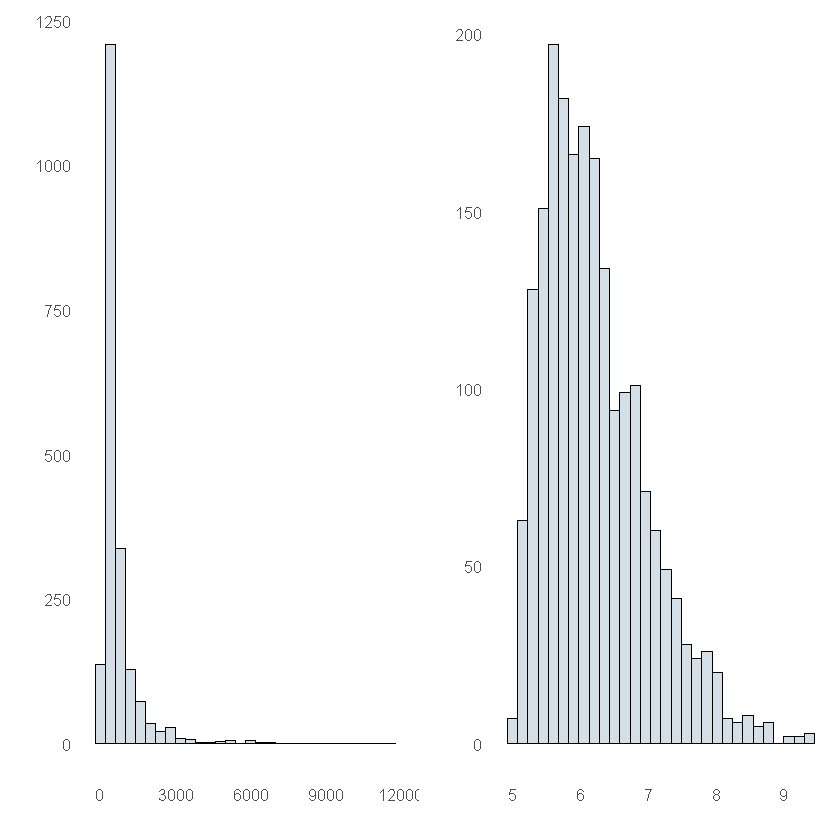

In [115]:
library(ggplot2)
library(ggthemes)
p1<- ggplot(segmentationOriginal, aes(EqEllipseOblateVolCh1)) + geom_histogram(bins = 30, fill = "#d4dee7", colour = "black") + theme_few()
p2<- ggplot(segmentationOriginal, aes(log(segmentationOriginal$EqEllipseOblateVolCh1))) + geom_histogram(bins = 30, fill = "#d4dee7", colour = "black") + 
    labs(x = "log(EqEllipseOblateVolCh1)") + theme_few() 
library(gridExtra)
grid.arrange(p1, p2, ncol=2)   
#theme(panel.grid.major = element_line(linetype = "dotted"),  panel.background=element_rect(fill="white",color="black"))

## Data Transformations for Multiple Predictors
- Transformations to Resolve Outliers
- Data Reduction and Feature Extraction

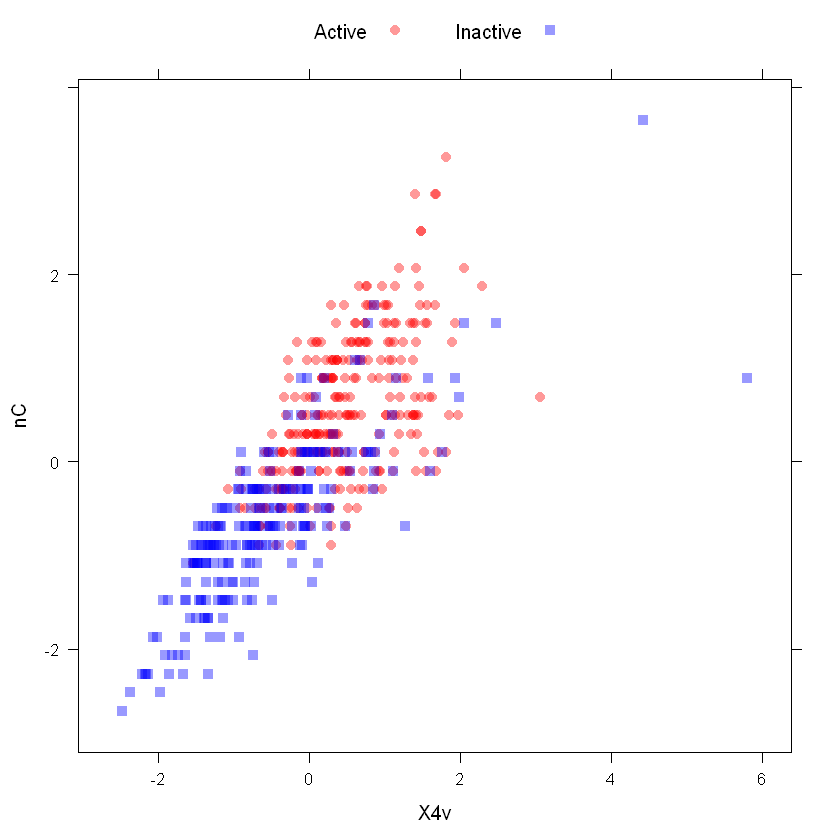

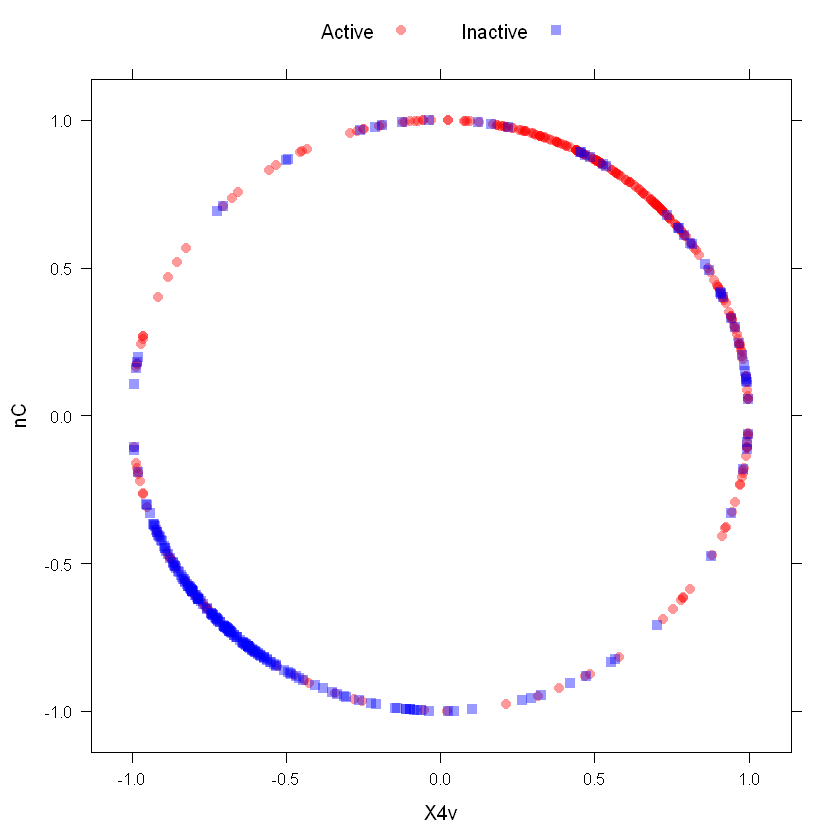

In [116]:
library(AppliedPredictiveModeling)
transparentTheme(trans = .4)
data(mdrr)
plotSubset <- data.frame(scale(mdrrDescr[,c("nC","X4v")]))
layout(matrix(c(1,2),nr=1,byrow=T))
xyplot(nC ~ X4v,data = plotSubset,groups = mdrrClass, auto.key = list(columns = 2))

transformed <- spatialSign(plotSubset)
transformed <- as.data.frame(transformed)
xyplot(nC ~ X4v, data = transformed, groups = mdrrClass, auto.key = list(columns = 2)) 

## Dealing with Missing Values

## Removing Predictors
-  Between-Predictors Correlations

## Adding Predictors

## Binning Predictors

## Computing
- Transformations
- Filtering
- Creating Dummy Variables

In [117]:
library(AppliedPredictiveModeling)
data(segmentationOriginal)
segData <- subset(segmentationOriginal,Case=="Train")
cellID <- segData$Cell
class <- segData$Class
case <- segData$Case
segData <- segData[,-(1:3)]

In [118]:
statusColNum <- grep("Status",names(segData))
statusColNum
segData <- segData[,-statusColNum]

[1]   2   4   9  10  11  12  14  16  20  21  22  26  27  28  30  32  34  36  38
[20]  40  43  44  46  48  51  52  55  56  59  60  63  64  68  69  70  72  73  74
[39]  76  78  80  82  84  86  88  92  93  94  97  98 103 104 105 106 110 111 112
[58] 114

In [119]:
#Transformations
library(e1071)
skewValues <- apply(segData,2,skewness)
sort(skewValues,decreasing = T)

KurtIntenCh1            KurtIntenCh4  EqEllipseProlateVolCh1 
            12.85964793              6.91850342              6.07083432 
         EqSphereVolCh1            KurtIntenCh3   EqEllipseOblateVolCh1 
             5.73950155              5.50561057              5.48931343 
          TotalIntenCh1         EqSphereAreaCh1                 AreaCh1 
             5.39960369              3.52514046              3.52510745 
   IntenCoocContrastCh4           TotalIntenCh4             AvgIntenCh1 
             3.47030470              3.14949913              2.95918524 
    DiffIntenDensityCh1         EqEllipseLWRCh1             VarIntenCh1 
             2.76047338              2.69399392              2.67793549 
      SpotFiberCountCh4                PerimCh1         IntenCoocASMCh4 
             2.62147413              2.58948824              2.51181114 
            ShapeLWRCh1  ConvexHullAreaRatioCh1           TotalIntenCh3 
             2.49099518              2.47658194              2.43167184 
        IntenCoocASMCh3      NeighborMinDistCh1             VarIntenCh3 
             2.41668747              2.40642938              2.39162433 
         FiberLengthCh1            SkewIntenCh4             AvgIntenCh3 
             2.33812032              2.29168970              2.20234214 
           SkewIntenCh1            SkewIntenCh3             VarIntenCh4 
             2.18798319              2.17169123              2.16174316 
            ShapeP2ACh1     DiffIntenDensityCh3           EqCircDiamCh1 
             2.15765195              2.08518782              1.95553035 
              LengthCh1             AvgIntenCh4     DiffIntenDensityCh4 
             1.90911468              1.90047128              1.89923287 
               WidthCh1    IntenCoocContrastCh3       SpotFiberCountCh3 
             1.88008417              1.64998549              1.56001537 
          TotalIntenCh2           FiberWidthCh1         IntenCoocMaxCh4 
             1.44494715              1.10843772              1.06382597 
        IntenCoocMaxCh3             AvgIntenCh2               YCentroid 
             0.97764760              0.84816033              0.49565380 
        EntropyIntenCh1      NeighborAvgDistCh1                AngleCh1 
             0.39789483              0.37923428             -0.02426252 
         FiberAlign2Ch3               XCentroid          FiberAlign2Ch4 
            -0.08507752             -0.10558948             -0.10845583 
     NeighborVarDistCh1             ShapeBFRCh1         EntropyIntenCh4 
            -0.11271294             -0.44474921             -0.82790492 
        EntropyIntenCh3     IntenCoocEntropyCh3     IntenCoocEntropyCh4 
            -1.00295336             -1.07569444             -1.16028408 
ConvexHullPerimRatioCh1 
            -1.30409896

In [120]:
library(caret)
Ch1AreaTrans <- BoxCoxTrans(segData$AreaCh1)
Ch1AreaTrans
predict(Ch1AreaTrans,head(segData$AreaCh1))

Box-Cox Transformation

1009 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  150.0   194.0   256.0   325.1   376.0  2186.0 

Largest/Smallest: 14.6 
Sample Skewness: 3.53 

Estimated Lambda: -0.9 


[1] 1.108458 1.106383 1.104520 1.103554 1.103607 1.105523

In [121]:
#the data are centered and scaled prior to PCA
pcaObject <- prcomp(segData,center = T,scale.=T)
percentVariance <- pcaObject$sd^2/sum(pcaObject$sd^2)*100
percentVariance[1:3]

[1] 20.91236 17.01330 11.88689

In [122]:
head(pcaObject$x[,1:5])

,PC1,PC2,PC3,PC4,PC5
2,5.0985749,4.5513804,-0.03345155,-2.640339,1.2783212
3,-0.2546261,1.1980326,-1.02059569,-3.731079,0.9994635
4,1.2928941,-1.8639348,-1.25110461,-2.414857,-1.4914838
12,-1.4646613,-1.5658327,0.46962088,-3.388716,-0.3302324
15,-0.8762771,-1.2790055,-1.33794261,-3.516794,0.3936099
16,-0.8615416,-0.3286842,-0.15546723,-2.206636,1.4731658


In [123]:
head(pcaObject$rotation[,1:3])

,PC1,PC2,PC3
AngleCh1,0.001213758,-0.01284461,0.006816473
AreaCh1,0.229171873,0.16061734,0.089811727
AvgIntenCh1,-0.102708778,0.17971332,0.067696745
AvgIntenCh2,-0.154828672,0.16376018,0.073534399
AvgIntenCh3,-0.058042158,0.11197704,-0.185473286
AvgIntenCh4,-0.117343465,0.21039086,-0.105060977


In [124]:
trans <- preProcess(segData,
                   method=c("BoxCox","center","scale","pca"))
trans
transformed <- predict(trans,segData)
head(transformed[,1:5])

Created from 1009 samples and 58 variables

Pre-processing:
  - Box-Cox transformation (47)
  - centered (58)
  - ignored (0)
  - principal component signal extraction (58)
  - scaled (58)

Lambda estimates for Box-Cox transformation:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.00000 -0.50000 -0.10000  0.05106  0.30000  2.00000 

PCA needed 19 components to capture 95 percent of the variance

,PC1,PC2,PC3,PC4,PC5
2,1.5684742,6.2907855,-0.3333299,-3.063327,-1.3415782
3,-0.6664055,2.0455375,-1.4416841,-4.701183,-1.7422020
4,3.7500055,-0.3915610,-0.6690260,-4.020753,1.7927777
12,0.3768509,-2.1897554,1.4380167,-5.327116,-0.4066757
15,1.0644951,-1.4646516,-0.9900478,-5.627351,-0.8650174
16,-0.3798629,0.2173028,0.4387980,-2.069880,-1.9363920


In [125]:
#Filtering
nearZeroVar(segData)

integer(0)

In [126]:
correlations <- cor(segData)
dim(correlations)
correlations[1:4,1:4]

[1] 58 58

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2
AngleCh1,1.000000000,-0.002627172,-0.04300776,-0.01944681
AreaCh1,-0.002627172,1.000000000,-0.02529739,-0.15330301
AvgIntenCh1,-0.043007757,-0.025297394,1.00000000,0.52521711
AvgIntenCh2,-0.019446810,-0.153303007,0.52521711,1.00000000


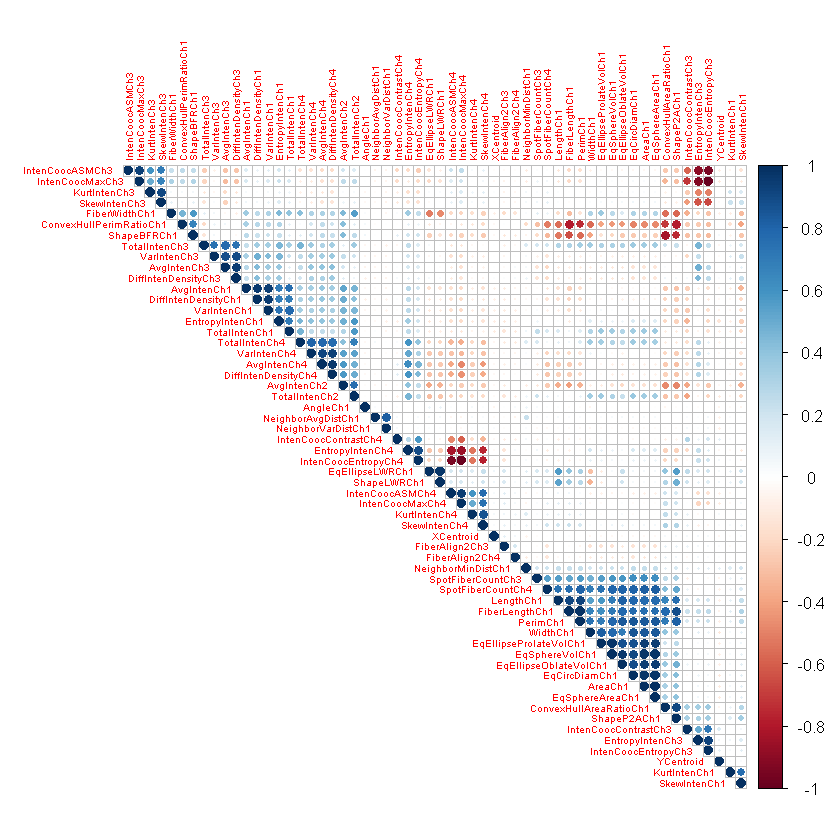

In [127]:
library(corrplot)
corrplot(correlations,type="upper",order="hclust",tl.cex = 0.5)

In [128]:
highCorr <- findCorrelation(correlations,cutoff = .75)
length(highCorr)
head(highCorr)
filteredSegData <- segData[,-highCorr]

[1] 32

[1] 23 40 43 36  7 15

In [129]:
# Creating Dummy Variables
data(cars)
type <- c("convertible", "coupe", "hatchback", "sedan", "wagon")
cars$Type <- factor(apply(cars[, 14:18], 1, function(x) type[which(x == 1)]))
carSubset <- cars[sample(1:nrow(cars), 20), c(1, 2, 19)]
head(carSubset)

,Price,Mileage,Type
681,18083.40,29420,sedan
512,12105.98,28298,sedan
74,42773.03,14546,convertible
689,18800.96,7961,sedan
542,21020.84,25550,coupe
676,11045.11,24568,hatchback


In [130]:
simpleMod <- dummyVars(~Mileage+Type , data = carSubset,levelsOnly = T)
simpleMod
predict(simpleMod,head(carSubset))

Dummy Variable Object

Formula: ~Mileage + Type
2 variables, 1 factors
Factor variable names will be removed
A less than full rank encoding is used

,Mileage,convertible,coupe,hatchback,sedan,wagon
681,29420,0,0,0,1,0
512,28298,0,0,0,1,0
74,14546,1,0,0,0,0
689,7961,0,0,0,1,0
542,25550,0,1,0,0,0
676,24568,0,0,1,0,0


In [131]:
withInteraction <- dummyVars(~Mileage+Type + Mileage:Type, data = carSubset,levelsOnly = T)
withInteraction
predict(withInteraction,head(carSubset))

Dummy Variable Object

Formula: ~Mileage + Type + Mileage:Type
2 variables, 1 factors
Factor variable names will be removed
A less than full rank encoding is used

,Mileage,convertible,coupe,hatchback,sedan,wagon,Mileage:convertible,Mileage:coupe,Mileage:hatchback,Mileage:sedan,Mileage:wagon
681,29420,0,0,0,1,0,0,0,0,29420,0
512,28298,0,0,0,1,0,0,0,0,28298,0
74,14546,1,0,0,0,0,14546,0,0,0,0
689,7961,0,0,0,1,0,0,0,0,7961,0
542,25550,0,1,0,0,0,0,25550,0,0,0
676,24568,0,0,1,0,0,0,0,24568,0,0
